* Total dataset size :  6420
* Length of Dataset 10s: 1931
60.91597510373444 11.697483237460377
65.15895765472312 13.578561717913908
66.66365688487585 13.5326891420647
65.28507462686566 12.13644755778185
63.33678756476684 10.045090606529438
62.72043010752688 9.47845955384799


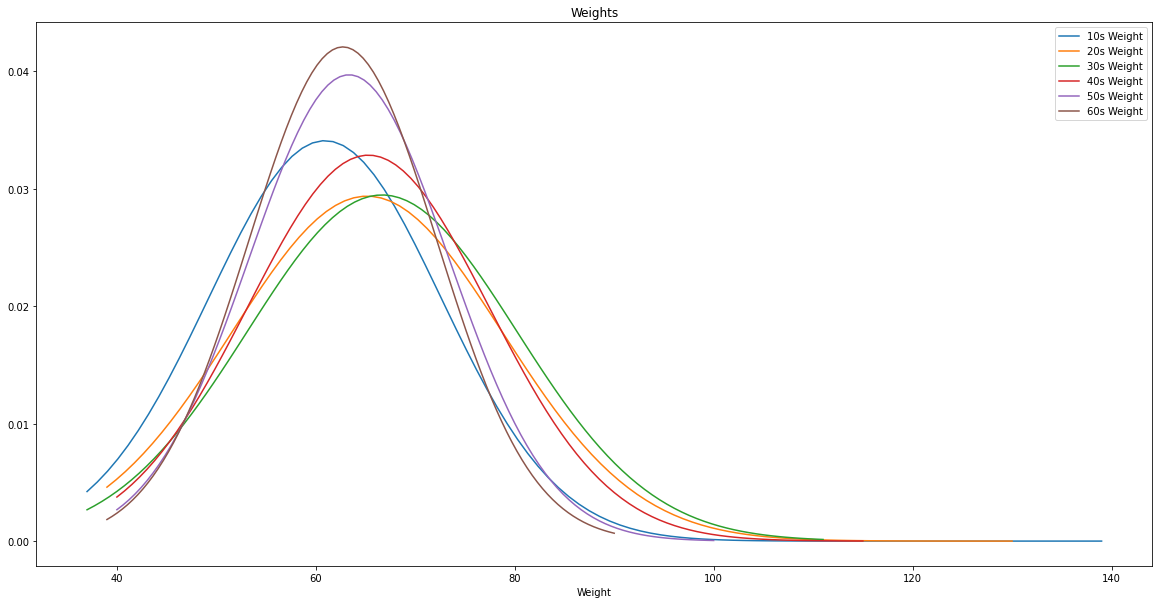

In [44]:

'''
@Brief  User body size estimator
@author Byunghun Hwang<bh.hwang@iae.re.kr>
@Date   2020.12.17
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import json
from scipy import stats

test_size = json.loads('{"age":42, "gender":"m", "height":181, "weight":72}')


dataset = pd.read_csv('./data_size/raw_size.csv', header=0, index_col=False)
print("* Total dataset size : ", len(dataset))

# slice the raw dataset by ages
dataset_group = {}
dataset_group["10s"] = dataset.loc[(dataset['age']>9) & (dataset['age']<20)]
dataset_group["20s"] = dataset.loc[(dataset['age']>19) & (dataset['age']<30)]
dataset_group["30s"] = dataset.loc[(dataset['age']>29) & (dataset['age']<40)]
dataset_group["40s"] = dataset.loc[(dataset['age']>39) & (dataset['age']<50)]
dataset_group["50s"] = dataset.loc[(dataset['age']>49) & (dataset['age']<60)]
dataset_group["60s"] = dataset.loc[(dataset['age']>59) & (dataset['age']<70)]

#extract data without NaN
print("* Length of Dataset 10s:",len(dataset_group["10s"]))
height_10s = dataset_group["10s"]["N31"].loc[dataset_group["10s"]['N31'].notna()] #extract not NaN
height_20s = dataset_group["20s"]["N31"].loc[dataset_group["20s"]['N31'].notna()] #extract not NaN
height_30s = dataset_group["30s"]["N31"].loc[dataset_group["30s"]['N31'].notna()] #extract not NaN
height_40s = dataset_group["40s"]["N31"].loc[dataset_group["40s"]['N31'].notna()] #extract not NaN
height_50s = dataset_group["50s"]["N31"].loc[dataset_group["50s"]['N31'].notna()] #extract not NaN
height_60s = dataset_group["60s"]["N31"].loc[dataset_group["60s"]['N31'].notna()] #extract not NaN

# calc normal dist. parameters
mean_10s, std_10s = stats.norm.fit(height_10s)
mean_20s, std_20s = stats.norm.fit(height_20s)
mean_30s, std_30s = stats.norm.fit(height_30s)
mean_40s, std_40s = stats.norm.fit(height_40s)
mean_50s, std_50s = stats.norm.fit(height_50s)
mean_60s, std_60s = stats.norm.fit(height_60s)

print(mean_10s, std_10s)
print(mean_20s, std_20s)
print(mean_30s, std_30s)
print(mean_40s, std_40s)
print(mean_50s, std_50s)
print(mean_60s, std_60s)



plt.figure(figsize=(20, 10))
#plot raw data histogram
#plt.hist(height_10s, bins=50, facecolor='blue', range=[height_10s.min(),height_10s.max()])

x_10s = np.linspace(height_10s.min(),height_10s.max(), 100)
x_20s = np.linspace(height_20s.min(),height_20s.max(), 100)
x_30s = np.linspace(height_30s.min(),height_30s.max(), 100)
x_40s = np.linspace(height_40s.min(),height_40s.max(), 100)
x_50s = np.linspace(height_50s.min(),height_50s.max(), 100)
x_60s = np.linspace(height_60s.min(),height_60s.max(), 100)

plt.plot(np.linspace(height_10s.min(),height_10s.max(), 100), stats.norm.pdf(x_10s, mean_10s, std_10s), Label="10s Weight")
plt.plot(np.linspace(height_20s.min(),height_20s.max(), 100), stats.norm.pdf(x_20s, mean_20s, std_20s), Label="20s Weight")
plt.plot(np.linspace(height_30s.min(),height_30s.max(), 100), stats.norm.pdf(x_30s, mean_30s, std_30s), Label="30s Weight")
plt.plot(np.linspace(height_40s.min(),height_40s.max(), 100), stats.norm.pdf(x_40s, mean_40s, std_40s), Label="40s Weight")
plt.plot(np.linspace(height_50s.min(),height_50s.max(), 100), stats.norm.pdf(x_50s, mean_50s, std_50s), Label="50s Weight")
plt.plot(np.linspace(height_60s.min(),height_60s.max(), 100), stats.norm.pdf(x_60s, mean_60s, std_60s), Label="60s Weight")

plt.legend()
plt.title('Weights')
plt.xlabel('Weight')
plt.show()



